<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/04.08-Two-Surge-Tanks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two surge tanks

This notebook shows how to use [`gekko`](https://gekko.readthedocs.io/en/latest/) to simulate the famous two surge tanks dynamic model.

\begin{align*}
A_1\frac{dh_1(t)}{dt} &= q_i(t) - q_1(t) \\
A_2\frac{dh_2(t)}{dt} &= q_1(t) - q_2(t) \\
q_1(t) &= C_{v,1}\sqrt{h_1(t)} \\
q_2(t) &= C_{v,2}\sqrt{h_2(t)}
\end{align*}

with
\begin{align*}
C_{v,i} &= \frac{1}{R_i}
\end{align*}

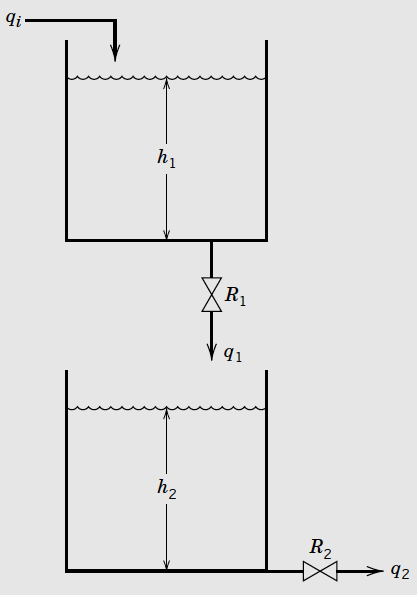   
Source: Figure 4.4 from Seborg 4<sup>th</sup> ed. p. 60.

In [ ]:
!pip install gekko
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

## Model definition

The following cell shows the five initial steps for the model definition. In this case we are modelling only the first surge tank

In [86]:
# model creation
m = GEKKO(remote=False)

# model parameters
A_1 = m.Const()    # tank #1 area
C_v_1 = m.Const()  # valve #1 flow coefficient

# model input variable(s)
q_i = m.Param()

# model output variable(s)
h_1 = m.Var(0.0)
q_1 = m.Var(0.0)

# model equations
m.Equation(A_1*h_1.dt()==q_i - q_1)
m.Equation(q_1==C_v_1*m.sqrt(h_1))

## Simulation definition

The following cell shows the three steps for the simulation definition.

In this case we will simulate a surge tank with $A_1=2.0$ and $C_{v,1}=1.0$ from $t_i=0$ to $t_f=90$ subject to a step-input in $q_i$ at $t_s=5$ with an amplitude $Δq_i=2.0$.

In [87]:
# simulation time
tfinal = 90
npoints = 10*tfinal+1
m.time = np.linspace(0,tfinal,npoints)

# model parameters definition
A_1.value = 2.0    # tank #1 area
C_v_1.value = 1.0  # valve #1 flow coefficient

# model input definition
tstep = 5
dstep = 2.0
u_step = np.zeros(npoints)
u_step[10*tstep:] = dstep
q_i.value = u_step

## Simulation and ploting

The following cell shows the two steps for the model simulation and the simulation results ploting .

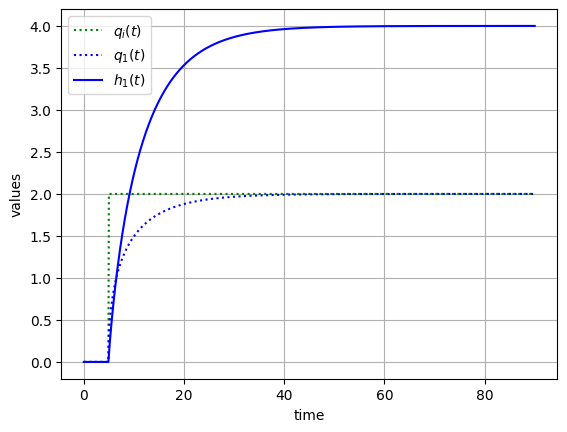

In [88]:
# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,q_i.value,'g:',label='$q_i(t)$')
plt.plot(m.time,q_1.value,'b:',label='$q_1(t)$')
plt.plot(m.time,h_1.value,'b-',label='$h_1(t)$')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.show()

## Two surge tanks (non-interacting)

The following cell shows the code for simulate and plot the results of a one surge tank as we did before.

You must update it in order to simulate and plot the results of a two surge tanks assuming that the size and the valves of both tanks are equal.

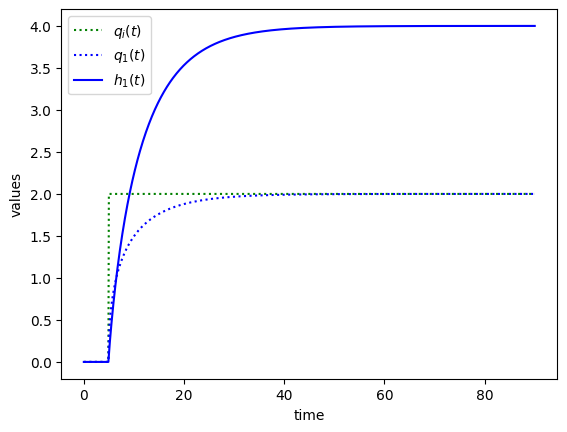

In [82]:
# model creation
m = GEKKO(remote=False)

# model parameters
A_1 = m.Const()    # tank #1 area
C_v_1 = m.Const()  # valve #1 flow coefficient

# model input variable(s)
q_i = m.Param()

# model output variable(s)
h_1 = m.Var(0.0)
q_1 = m.Var(0.0)

# model equations
m.Equation(A_1*h_1.dt()==q_i - q_1)
m.Equation(q_1==C_v_1*m.sqrt(h_1))

# simulation time
tfinal = 90
npoints = 10*tfinal+1
m.time = np.linspace(0,tfinal,npoints)

# model parameters definition
A_1.value = 2.0    # tank #1 area
C_v_1.value = 1.0  # valve #1 flow coefficient

# model input definition
tstep = 5
dstep = 2.0
u_step = np.zeros(npoints)
u_step[10*tstep:] = dstep
q_i.value = u_step

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,q_i.value,'g:',label='$q_i(t)$')
plt.plot(m.time,q_1.value,'b:',label='$q_1(t)$')
plt.plot(m.time,h_1.value,'b-',label='$h_1(t)$')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.show()

## Two surge tanks (interacting)

The two surge tanks dynamic model we had developed before is said non-interacting because there is no interaction between both tanks due to the fact that they are not at the same vertical position.

If both tanks are at the same vertical position, we have a very different dynamic model as shown below.

\begin{align*}
A_1\frac{dh_1(t)}{dt} &= q_i(t) - q_1(t) \\
\
A_2\frac{dh_2(t)}{dt} &= q_1(t) - q_2(t) \\
q_1(t) &= C_{v,1}\frac{\Delta{h(t)}}{|{\Delta{h(t)}}|}\sqrt{|\Delta{h(t)}|} \\
q_2(t) &= C_{v,2}\sqrt{h_2(t)} \\
\Delta{h(t)} &= h_1(t) - h_2(t)
\end{align*}

with
\begin{align*}
C_{v,i} = \frac{1}{R_i}
\end{align*}

The two surge tanks dynamic model above is said interacting.

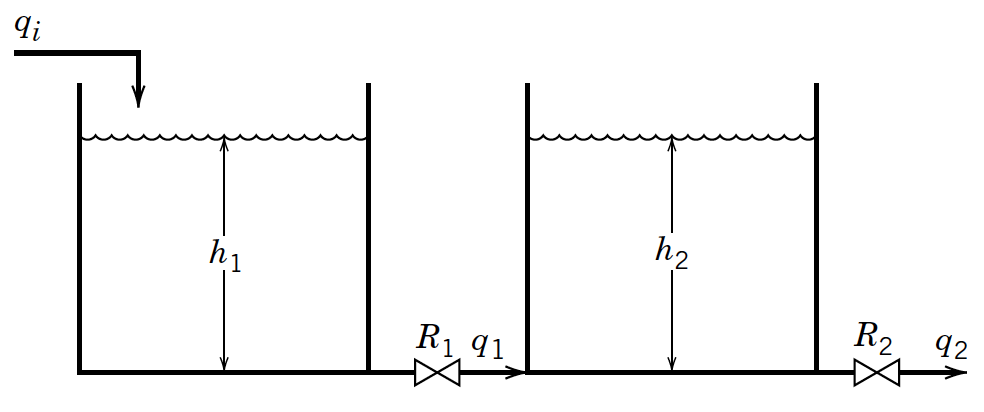
Source: Figure 6.11 from Seborg 4<sup>th</sup> ed. p. 95.

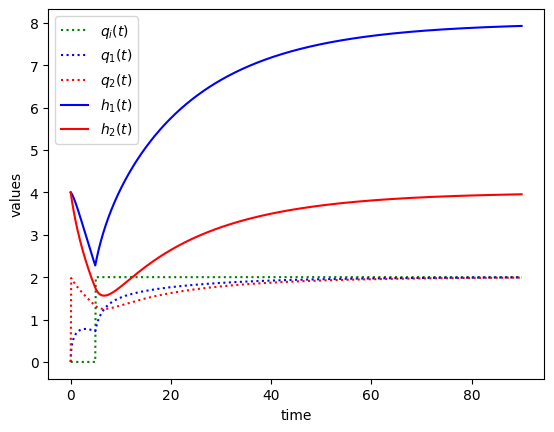

In [84]:
# model creation
m = GEKKO(remote=False)

# model parameters
A_1 = m.Const()    # tank #1 area
C_v_1 = m.Const()  # valve #1 flow coefficient
A_2 = m.Const()    # tank #2 area
C_v_2 = m.Const()  # valve #2 flow coefficient

# model input variable(s)
q_i = m.Param(2.0)

# model output variable(s)
h_1 = m.Var(4.0)
h_2 = m.Var(4.0)
q_1 = m.Var(0.0)
q_2 = m.Var(0.0)

# model equations
m.Equation(A_1*h_1.dt()==q_i - q_1)
m.Equation(A_2*h_2.dt()==q_1 - q_2)
m.Equation(q_1==C_v_1*(h_1 - h_2)/(m.abs(h_1 - h_2)+1e-6)*m.sqrt(m.abs(h_1 - h_2)))
m.Equation(q_2==C_v_2*m.sqrt(h_2))

# simulation time
tfinal = 90
npoints = 10*tfinal+1
m.time = np.linspace(0,tfinal,npoints)

# model parameters definition
A_1.value = 2.0    # tank #1 area
C_v_1.value = 1.0  # valve #1 flow coefficient
A_2.value = 2.0    # tank #2 area
C_v_2.value = 1.0  # valve #2 flow coefficient

# model input definition
tstep = 5
dstep = 2.0
u_step = np.zeros(npoints)
u_step[10*tstep:] = dstep
q_i.value = u_step

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,q_i.value,'g:',label='$q_i(t)$')
plt.plot(m.time,q_1.value,'b:',label='$q_1(t)$')
plt.plot(m.time,q_2.value,'r:',label='$q_2(t)$')
plt.plot(m.time,h_1.value,'b-',label='$h_1(t)$')
plt.plot(m.time,h_2.value,'r-',label='$h_2(t)$')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.show()